In [1]:
import pandas as pd
import xml.etree.ElementTree as et

In [2]:
# read the root document and a child
def readXmlDoc(xml_doc, child):
    # I want all my attributes
    attr = xml_doc.attrib
    
    for xml in xml_doc.iter(child):
        # take a copy of this elmt
        doc_dict = attr.copy()
        # update with my doc attributes
        doc_dict.update(xml.attrib)
        # get the text
        doc_dict['data'] = xml.text
        
        yield doc_dict

In [3]:
etree = et.parse('pmd_rules_results.xml')

In [4]:
df = pd.DataFrame(list(readXmlDoc(etree.getroot(), '{http://pmd.sourceforge.net/report/2.0.0}violation')))

In [5]:
df.head()

,{http://www.w3.org/2001/XMLSchema-instance}schemaLocation,version,timestamp,beginline,endline,begincolumn,endcolumn,rule,ruleset,class,externalInfoUrl,priority,data,method,variable,package
0,http://pmd.sourceforge.net/report/2.0.0 http:/...,6.39.0,2021-11-01T11:37:35.351,1,11,43,1,UseUtilityClass,Design,Code_10000096_9914015_1959_0,https://pmd.github.io/pmd-6.39.0/pmd_rules_jav...,3,\nAll methods are static. Consider using a ut...,NaN,NaN,NaN
1,http://pmd.sourceforge.net/report/2.0.0 http:/...,6.39.0,2021-11-01T11:37:35.351,1,11,8,1,ClassNamingConventions,Code Style,Code_10000096_9914015_1959_0,https://pmd.github.io/pmd-6.39.0/pmd_rules_jav...,1,\nThe class name 'Code_10000096_9914015_1959_0...,NaN,NaN,NaN
2,http://pmd.sourceforge.net/report/2.0.0 http:/...,6.39.0,2021-11-01T11:37:35.351,3,3,29,41,MethodArgumentCouldBeFinal,Code Style,Code_10000096_9914015_1959_0,https://pmd.github.io/pmd-6.39.0/pmd_rules_jav...,3,\nParameter 'args' is not assigned and could b...,main,args,NaN
3,http://pmd.sourceforge.net/report/2.0.0 http:/...,6.39.0,2021-11-01T11:37:35.351,5,5,9,39,LocalVariableCouldBeFinal,Code Style,Code_10000096_9914015_1959_0,https://pmd.github.io/pmd-6.39.0/pmd_rules_jav...,3,\nLocal variable 'client' could be declared fi...,main,VariableDeclaratorId,NaN
4,http://pmd.sourceforge.net/report/2.0.0 http:/...,6.39.0,2021-11-01T11:37:35.351,6,6,9,119,LocalVariableCouldBeFinal,Code Style,Code_10000096_9914015_1959_0,https://pmd.github.io/pmd-6.39.0/pmd_rules_jav...,3,\nLocal variable 'web_resource' could be decla...,main,VariableDeclaratorId,NaN


In [6]:
df.shape[0]

4896537

In [7]:
#replace new lines with empty strings
df = df.replace('\n','', regex=True)

In [8]:
df.shape[0]

4896537

In [9]:
# Check it out
#for index, row in df.iterrows():
for index, row in df.loc[1000:1010, :].iterrows():
    print('index:', index)
    print('class:', row['class'])
    print('variable:', row['variable'])

index: 1000
class: Code_10017013_10016506_1372_2
variable: second
index: 1001
class: Code_10017406_10017381_5_0
variable: nan
index: 1002
class: Code_10017502_10017267_1379_0
variable: nan
index: 1003
class: Code_10017502_10017267_1379_0
variable: nan
index: 1004
class: Code_10017502_10017267_1379_0
variable: max
index: 1005
class: Code_10017502_10017267_1379_0
variable: nan
index: 1006
class: Code_10017502_10017267_1379_0
variable: nan
index: 1007
class: Code_10017502_10017267_1379_4
variable: nan
index: 1008
class: Code_10017502_10017267_1379_4
variable: nan
index: 1009
class: Code_10017502_10017267_1379_4
variable: max
index: 1010
class: Code_10017502_10017267_1379_4
variable: nan


In [10]:
# drop empty columns
df = df[~df['class'].isna()] # Drop rows that have NaN in the Code column

In [11]:
df.shape[0]

4887262

In [12]:
# drop classes that do not have this pattern
df = df[df['class'].str.contains('^Code_\d+_\d+_\d+_\d+', regex=True)]

In [13]:
# select multiple columns
#df1 = df[['class', 'beginline', 'endline', 'begincolumn', 'endcolumn', 'rule', 'ruleset', 'variable', 'data']]
df = df[['class', 'rule', 'ruleset', 'variable', 'data']]

In [14]:
df.shape[0]

4689252

In [15]:
df.head()

,class,rule,ruleset,variable,data
0,Code_10000096_9914015_1959_0,UseUtilityClass,Design,NaN,All methods are static. Consider using a util...
1,Code_10000096_9914015_1959_0,ClassNamingConventions,Code Style,NaN,The class name 'Code_10000096_9914015_1959_0' ...
2,Code_10000096_9914015_1959_0,MethodArgumentCouldBeFinal,Code Style,args,Parameter 'args' is not assigned and could be ...
3,Code_10000096_9914015_1959_0,LocalVariableCouldBeFinal,Code Style,VariableDeclaratorId,Local variable 'client' could be declared final
4,Code_10000096_9914015_1959_0,LocalVariableCouldBeFinal,Code Style,VariableDeclaratorId,Local variable 'web_resource' could be declare...


In [16]:
pd.set_option('display.max_colwidth', None)
print(str(df.loc[df.index==1, 'data'].values[0]))

The class name 'Code_10000096_9914015_1959_0' doesn't match '[A-Z][a-zA-Z0-9]*'


In [17]:
# We did not name our classes following the naming convensions 
# hence we will remove all the records that have Our class name mentioned in the ClassNamingConensions 
# - The logic for using this is that the class may contain contain a subclass that is not following the naming convension
df2 = df[~df['data'].str.contains('^Code_\d+_\d+_\d+_\d+', regex=True) & df['rule'].str.contains('ClassNamingConventions')]

In [18]:
df2.head()

,class,rule,ruleset,variable,data
1,Code_10000096_9914015_1959_0,ClassNamingConventions,Code Style,NaN,The class name 'Code_10000096_9914015_1959_0' doesn't match '[A-Z][a-zA-Z0-9]*'
13,Code_10000096_9914015_1959_1,ClassNamingConventions,Code Style,NaN,The class name 'Code_10000096_9914015_1959_1' doesn't match '[A-Z][a-zA-Z0-9]*'
17,Code_10000439_9999961_2190_4,ClassNamingConventions,Code Style,NaN,The class name 'Code_10000439_9999961_2190_4' doesn't match '[A-Z][a-zA-Z0-9]*'
42,Code_10000686_9997539_2792_13,ClassNamingConventions,Code Style,NaN,The class name 'Code_10000686_9997539_2792_13' doesn't match '[A-Z][a-zA-Z0-9]*'
47,Code_10000810_10000468_1960_0,ClassNamingConventions,Code Style,NaN,The class name 'Code_10000810_10000468_1960_0' doesn't match '[A-Z][a-zA-Z0-9]*'


In [19]:
df2.shape[0]

731099

In [20]:
# Get all the dataset that does not apply to our naming convension cases cases
#df = df[~(df['class'].isin(df2['class'].compute())&df['rule'].isin(df2['rule'].compute())&df['ruleset'].isin(df2['ruleset'].compute()))]
df = df[~(df['class'].isin(df2['class'])&df['rule'].isin(df2['rule'])&df['ruleset'].isin(df2['ruleset']))]

In [21]:
df.shape[0]

3958153

In [22]:
grp_df = df.groupby(['class', 'rule'])
#grp_df = df.groupby(['class', 'rule', 'ruleset'])

In [23]:
grp_df

In [24]:
# Let's print the first entries
# in all the groups formed.
grp_df.first()

ruleset  \
class                        rule                                             
Code_10000096_9914015_1959_0 LawOfDemeter                            Design   
                             LocalVariableCouldBeFinal           Code Style   
                             LocalVariableNamingConventions      Code Style   
                             MethodArgumentCouldBeFinal          Code Style   
                             SystemPrintln                   Best Practices   
...                                                                     ...   
Code_9999613_9999501_2943_0  SystemPrintln                   Best Practices   
                             UseUtilityClass                         Design   
Code_9999651_9996647_1167_0  BeanMembersShouldSerialize         Error Prone   
                             RedundantFieldInitializer          Performance   
Code_9999771_9999731_701_2   AvoidStringBufferField          Best Practices   

                                                                         variable  \
class                        rule                                                   
Code_10000096_9914015_1959_0 LawOfDemeter                                    None   
                             LocalVariableCouldBeFinal       VariableDeclaratorId   
                             LocalVariableNamingConventions          web_resource   
                             MethodArgumentCouldBeFinal                      args   
                             SystemPrintln                                   None   
...                                                                           ...   
Code_9999613_9999501_2943_0  SystemPrintln                                   None   
                             UseUtilityClass                                 None   
Code_9999651_9996647_1167_0  BeanMembersShouldSerialize                  position   
                             RedundantFieldInitializer                   position   
Code_9999771_9999731_701_2   AvoidStringBufferField                          None   

                                                                                                                                                                                                                                data  
class                        rule                                                                                                                                                                                                     
Code_10000096_9914015_1959_0 LawOfDemeter                                                                                                                         Potential violation of Law of Demeter (object not created locally)  
                             LocalVariableCouldBeFinal                                                                                                                               Local variable 'client' could be declared final  
                             LocalVariableNamingConventions                                                                                                 The local variable name 'web_resource' doesn't match '[a-z][a-zA-Z0-9]*'  
                             MethodArgumentCouldBeFinal                                                                                                                 Parameter 'args' is not assigned and could be declared final  
                             SystemPrintln                                                                                                                                                                System.out.println is used  
...                                                                                                                                                                                                                              ...  
Code_9999613_9999501_2943_0  SystemPrintln                                            

In [25]:
df3 = df[['rule']] 

In [26]:
df3.head()

,rule
0,UseUtilityClass
2,MethodArgumentCouldBeFinal
3,LocalVariableCouldBeFinal
4,LocalVariableCouldBeFinal
5,LawOfDemeter


<AxesSubplot:xlabel='rule'>

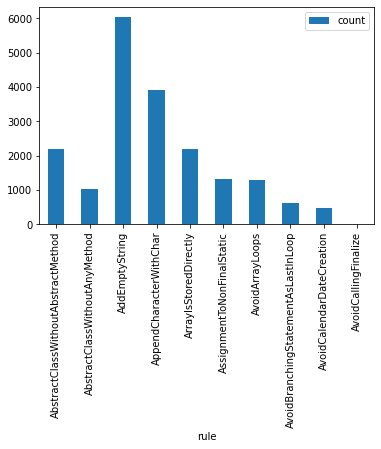

In [27]:
# count top 10
df3.groupby('rule')['rule'].agg(['count']).head(10).plot(kind='bar')

In [28]:
df3.head()

,rule
0,UseUtilityClass
2,MethodArgumentCouldBeFinal
3,LocalVariableCouldBeFinal
4,LocalVariableCouldBeFinal
5,LawOfDemeter


In [ ]:
df3.groupby('rule', sort=True)['rule'].agg(['count']).head(10).plot(kind='bar')

<AxesSubplot:xlabel='rule'>

['codesnippets_java/codesnippets1900000-1953970.zip']
